In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
"https://docs.fast.ai/tutorial.vision.html#cats-vs-dogs"

'https://docs.fast.ai/tutorial.vision.html#cats-vs-dogs'

In [6]:
def label_func(f): return f[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

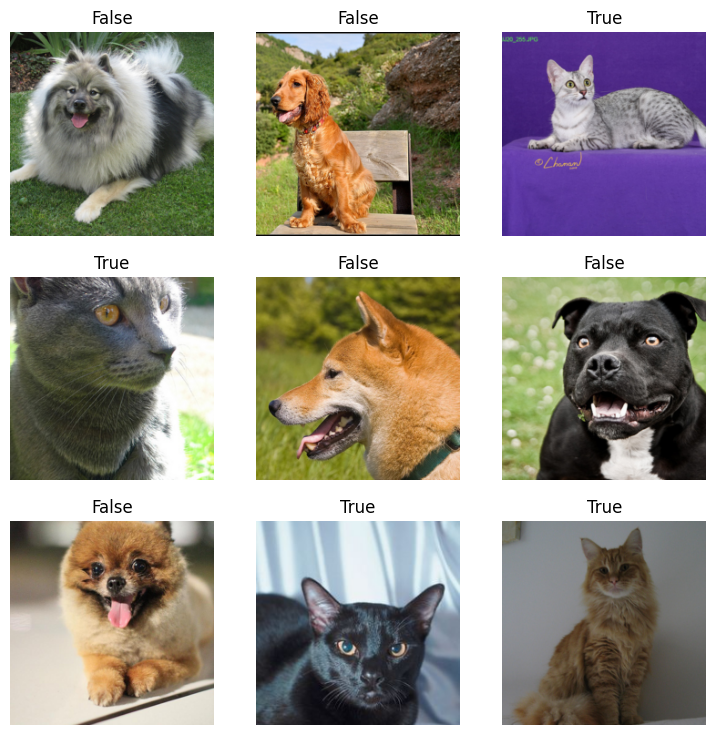

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 128MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.130253,0.032602,0.006766,23:49


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.068989,0.027888,0.008796,23:47


In [10]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 3.8092e-06]))

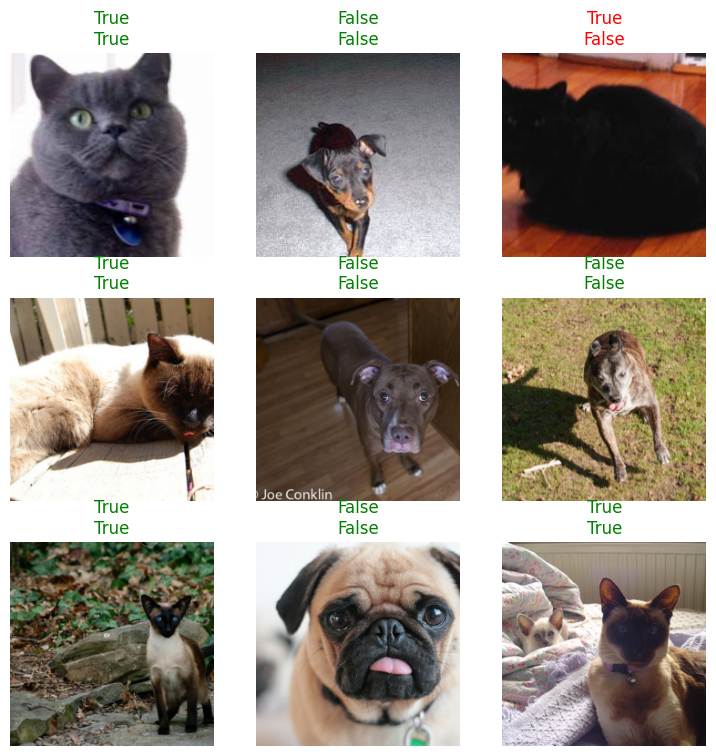

In [11]:
learn.show_results()

In [12]:
"https://docs.fast.ai/tutorial.vision.html#classifying-breeds"

'https://docs.fast.ai/tutorial.vision.html#classifying-breeds'

In [13]:
files[0].name

'beagle_115.jpg'

In [16]:
pat = r'^(.*)_\d+.jpg'

In [17]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

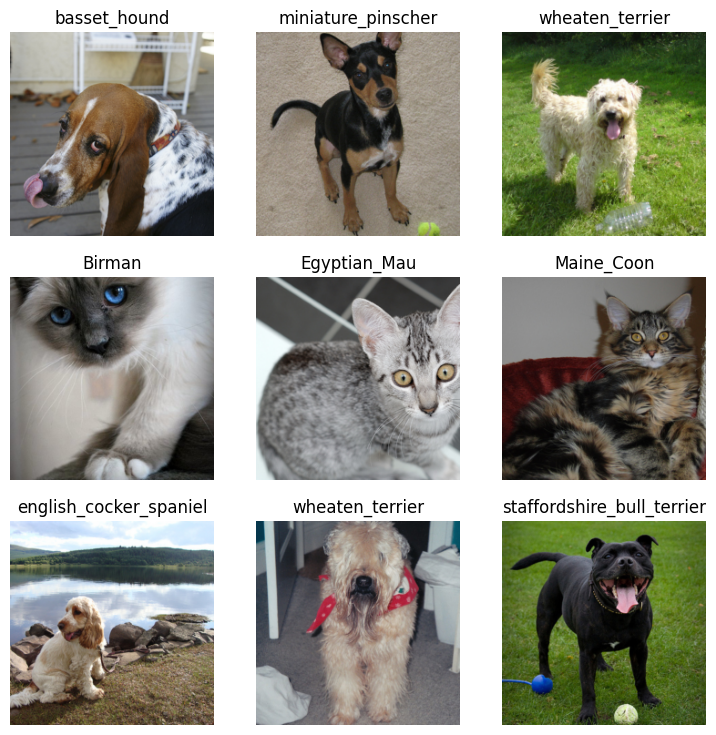

In [18]:
dls.show_batch()

In [19]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

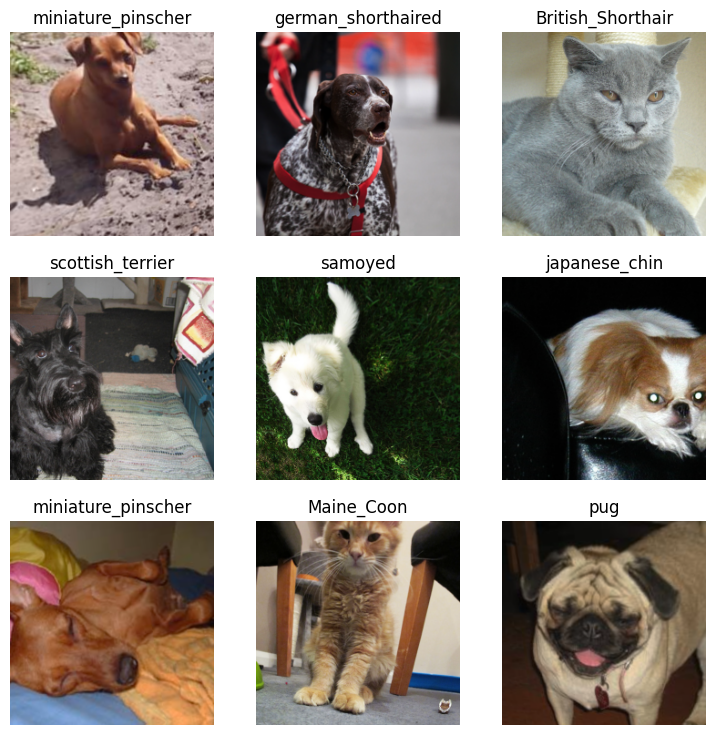

In [20]:
dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

In [ ]:
learn.show_results()